# 유니티 주식 예측

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

print(pandas.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)

1.5.3
1.2.2
0.13.5


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
dataset_filepath = '/content/drive/MyDrive/Colab Notebooks/aiffel/data/Unity20220413_230413.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2022-04-13    94.029999
2022-04-14    89.129997
2022-04-18    87.199997
2022-04-19    91.639999
2022-04-20    83.769997
Name: Close, dtype: float64

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-13,90.000000,95.459999,89.360001,94.029999,94.029999,2024500
2022-04-14,94.129997,94.339996,88.650002,89.129997,89.129997,2582000
2022-04-18,88.699997,89.342003,85.070000,87.199997,87.199997,2008400
2022-04-19,87.199997,92.870003,86.529999,91.639999,91.639999,2041600
2022-04-20,90.660004,91.489998,83.403999,83.769997,83.769997,3928100
...,...,...,...,...,...,...
2023-04-05,32.000000,32.020000,29.340000,30.430000,30.430000,9821900
2023-04-06,30.110001,31.430000,29.780001,31.129999,31.129999,6079400
2023-04-10,30.400000,30.830000,29.915001,30.670000,30.670000,6564400


In [ ]:
# 결측치 처리
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [ ]:
# 로그 변환 시도 
ts_log = np.log(ts)
ts_log

Date
2022-04-13    4.543614
2022-04-14    4.490096
2022-04-18    4.468204
2022-04-19    4.517868
2022-04-20    4.428075
                ...   
2023-04-05    3.415429
2023-04-06    3.438172
2023-04-10    3.423285
2023-04-11    3.427515
2023-04-12    3.364188
Name: Close, Length: 250, dtype: float64

In [ ]:
# 구간 통계치를 시각화하는 함수
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


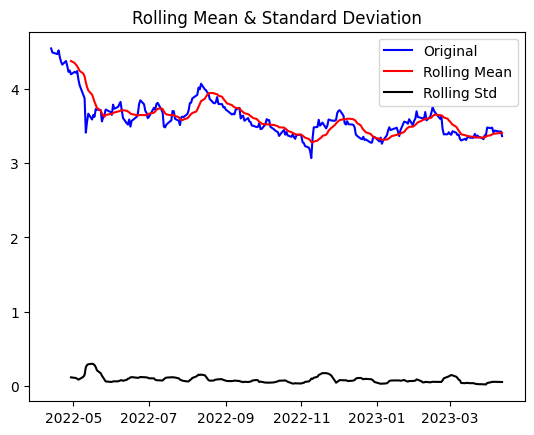

Results of Dickey-Fuller Test:
Test Statistic                  -3.599916
p-value                          0.005763
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


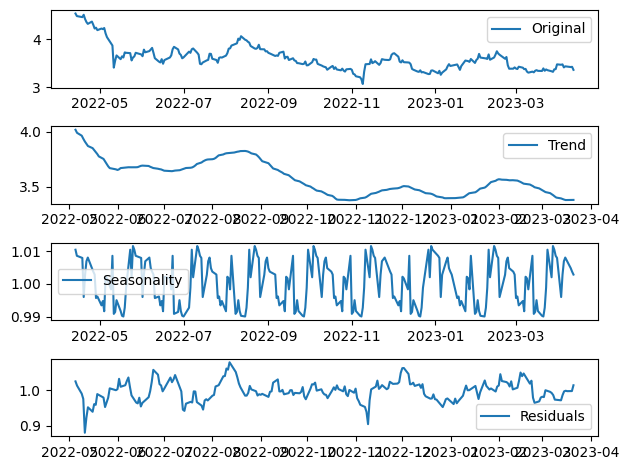

In [ ]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [18]:
# Residual 안정성 확인
# [[YOUR CODE]]
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.177927
p-value                          0.000010
#Lags Used                       9.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


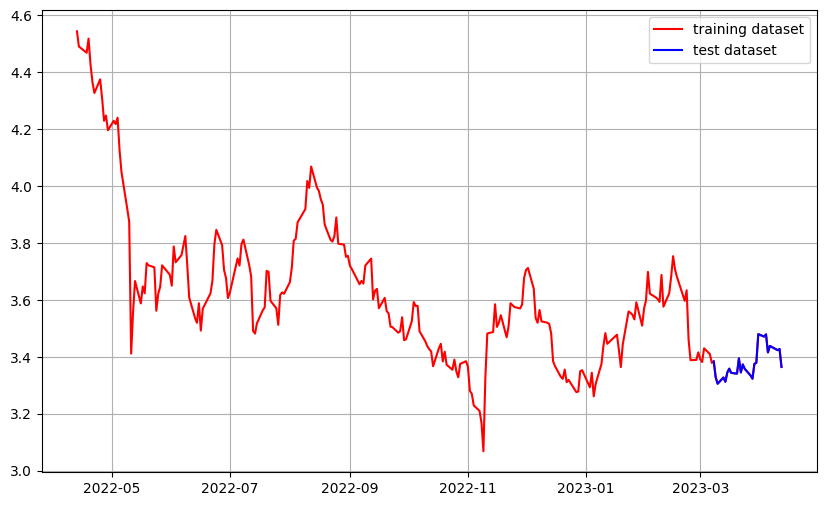

In [20]:
# train_data, test_data = # [[YOUR CODE]]
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


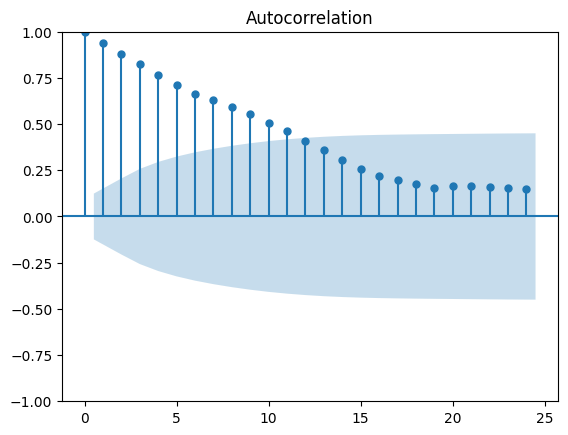

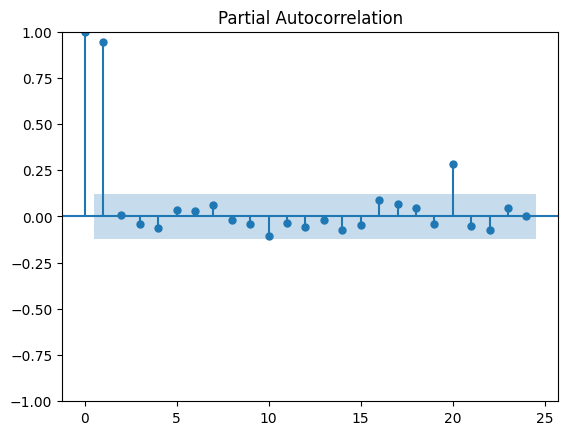

In [21]:
# ACF, PACF 그려보기 -> p,q 구하기
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# [[YOUR CODE]]

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.596993e+01
p-value                        7.023177e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.567582e+00
p-value                        2.334612e-16
#Lags Used                     9.000000e+00
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


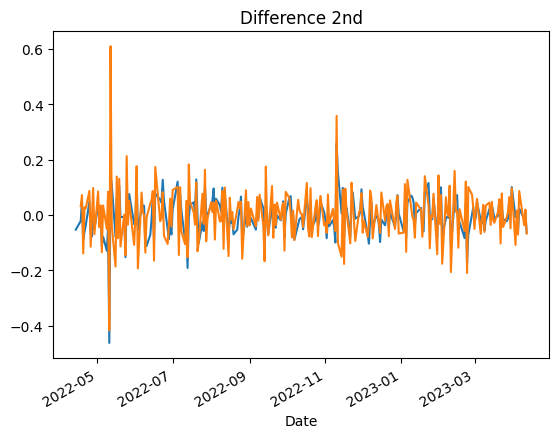

In [23]:
# 차분 안정성 확인 -> d 구하기
# [[YOUR CODE]]
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

In [25]:
# from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
# [[YOUR CODE]]

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/l

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 279.286
Date:                Fri, 14 Apr 2023   AIC                           -548.573
Time:                        05:59:50   BIC                           -531.492
Sample:                             0   HQIC                          -541.679
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7985      0.208     18.253      0.000       3.391       4.206
ar.L1          0.0752      0.040      1.871      0.061      -0.004       0.154
ar.L2          0.8951      0.039     22.915      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


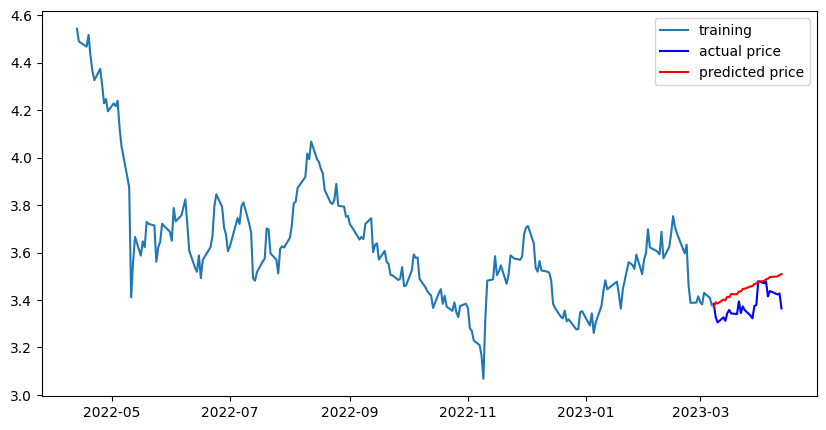

In [26]:
# Forecast : 결과가 fc에 담깁니다. 
# [[YOUR CODE]]

# Make as pandas series
# [[YOUR CODE]]

# Plot
# [[YOUR CODE]]


# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [27]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import math

# mse = # [[YOUR CODE]]
# print('MSE: ', mse)

# mae = # [[YOUR CODE]]
# print('MAE: ', mae)

# rmse = # [[YOUR CODE]]
# print('RMSE: ', rmse)

# mape = # [[YOUR CODE]]
# print('MAPE: {:.2f}%'.format(mape*100))

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  5.862998303560959
MAE:  2.1661729579007742
RMSE:  2.4213629020782816
MAPE: 7.52%


In [28]:
# STEP 7 : 다른 주식 종목 예측해 보기
# 우선은 유니티만 하였습니다.